# Библиотеки и данные

In [54]:
import pandas as pd
from google.colab import files 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
from scipy import stats

Финальный датасет из примера (загружаем)

In [55]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean (1).csv


In [56]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
35512,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
35513,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
35514,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0,6,8333.333333
35515,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35517 non-null  object 
 1   Model                 35517 non-null  object 
 2   Year                  35517 non-null  int64  
 3   Style                 35517 non-null  object 
 4   Distance              35517 non-null  float64
 5   Engine_capacity(cm3)  35517 non-null  float64
 6   Fuel_type             35517 non-null  object 
 7   Transmission          35517 non-null  object 
 8   Price(euro)           35517 non-null  float64
 9   Age                   35517 non-null  int64  
 10  km_year               35517 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 3.0+ MB


# Визуализация

Гистограмма с наиболее высокой стоимостью в зависимости от кузова

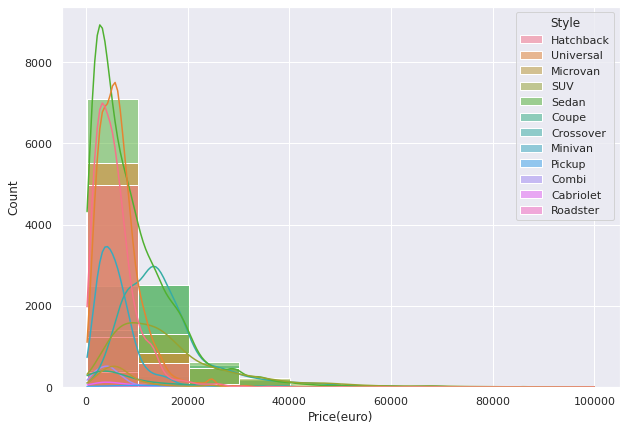

In [58]:
plt.figure(figsize=(10,7))
sns.histplot(    
    data=df,
    x="Price(euro)",
    hue="Style",
    bins=10,
    kde=True  
    );

Скаттерограмма с зависимостью цены от возраста, а ещё с пробегом и типом топлива

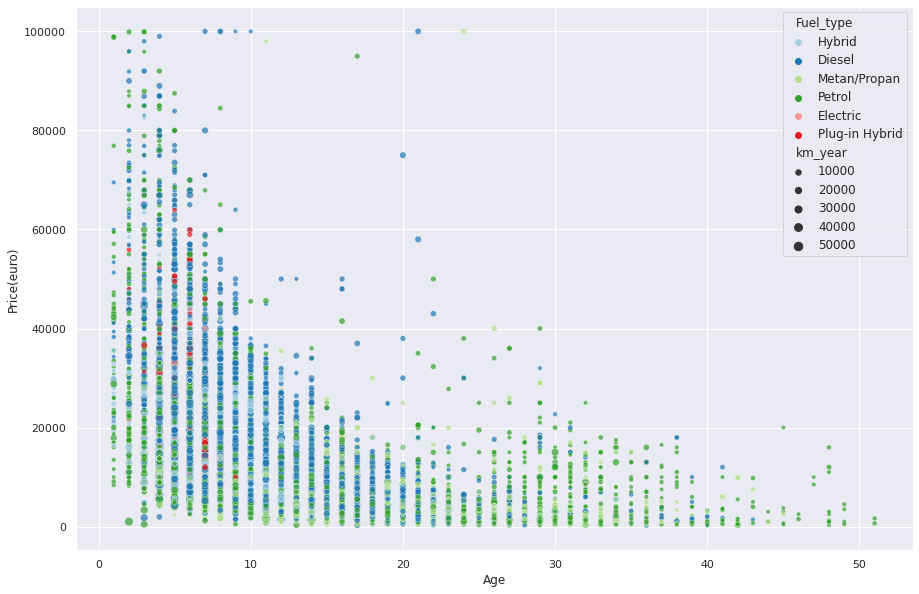

In [59]:
plt.figure(figsize=(15,10))
sns.scatterplot(    
    data=df,
    x="Age", y="Price(euro)",
    hue="Fuel_type", 
    size = "km_year", alpha = 0.7,
             palette='Paired'
    );

Скаттерограмма зависимости цены от объёма двигателя с разделением по типу топлива

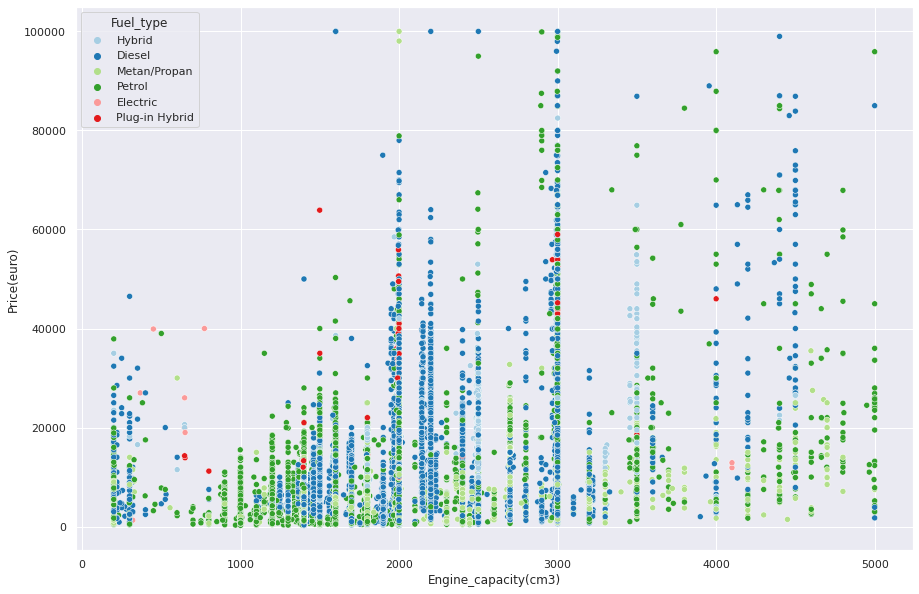

In [60]:
plt.figure(figsize=(15,10))
sns.scatterplot(    
    data=df,
    x="Engine_capacity(cm3)", y="Price(euro)",
    hue="Fuel_type", palette='Paired'
    );

# Дополнительные признаков

**Квантильные категории для столбца "удельный пробег за год"**

Добавим колонку "Mid_distance" куда записывается значение many если пробег за год больше 26000, notMany если он меньше 12000 и middle если он между 12000 и 26000

In [61]:
conditions = [(df['km_year'] <= 12000), (df['km_year'] >= 26000)]
values = ['notMany', 'many']
df['Mid_distance'] = np.select(conditions, values, default='middle')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  35517 non-null  object 
 1   Model                 35517 non-null  object 
 2   Year                  35517 non-null  int64  
 3   Style                 35517 non-null  object 
 4   Distance              35517 non-null  float64
 5   Engine_capacity(cm3)  35517 non-null  float64
 6   Fuel_type             35517 non-null  object 
 7   Transmission          35517 non-null  object 
 8   Price(euro)           35517 non-null  float64
 9   Age                   35517 non-null  int64  
 10  km_year               35517 non-null  float64
 11  Mid_distance          35517 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 3.3+ MB


Если авто находится в категории Rare и стоит меньше 1500, поменяем производителя на Rare_cheap. А, если стоимость больше 20000 - на Rare_expencive.
P.S. Цифры взяты по субъективному мнению

In [62]:
df['Make'] = np.where((df['Price(euro)'] < 2500) & (df['Make'] == 'Rare'), 'Rare_cheap', df['Make'])
df['Make'] = np.where((df['Price(euro)'] < 35000) & (df['Make'] == 'Rare'), 'Rare_expencive', df['Make'])

In [63]:
counts = df.Make.value_counts()

counts

Volkswagen        3730
Toyota            3410
Mercedes          3287
BMW               2797
Renault           2616
Opel              1956
Skoda             1902
Audi              1649
Ford              1493
Dacia             1458
Nissan            1449
Hyundai           1444
Honda              965
KIA                735
Mitsubishi         670
Lexus              658
Volvo              630
Vaz                493
Mazda              477
Chevrolet          432
Peugeot            414
Citroen            324
Land Rover         305
Seat               258
Suzuki             257
Porsche            222
Fiat               194
Rare_expencive     158
Subaru             154
Rare_cheap         101
Rover               98
Chrysler            93
Jeep                83
Infiniti            78
Mini                76
Jaguar              75
Daewoo              66
Lincoln             54
Dodge               51
Alfa Romeo          38
GAZ                 34
Ssangyong           34
Smart               33
Moskvich / 

#  Обработаем предварительно данных

Делим данные на числовые и категориальные типы

In [64]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

Теперь их нормализуем

In [65]:
DF_norm  = df.copy()
Xmin = df[num_columns].min()
Xmax = df[num_columns].max()

DF_norm[num_columns] = (df[num_columns]- Xmin)/( Xmax - Xmin)

После чего стандартизируем

In [66]:
DF_scaled = df.copy()
M = df[num_columns].mean()
STD = df[num_columns].std()
DF_scaled[num_columns] = (df[num_columns]-M)/STD

Теперь производим степенное преобразование (Box-Cox)

In [67]:
stats.boxcox(df['Distance'])
stats.boxcox(df['Year'])
stats.boxcox(df['Engine_capacity(cm3)'])
stats.boxcox(df['Price(euro)'])
stats.boxcox(df['Age'])
stats.boxcox(df['km_year'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


(array([1595.82854755, 1540.12542208, 1131.14059545, ...,  925.82727389,
        1932.9549679 , 1661.69420266]), 0.7204592082840217)

Ordinal / One-Hot Encoding

In [68]:
pd.get_dummies(df[cat_columns])

,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,Make_Citroen,Make_Dacia,Make_Daewoo,Make_Daihatsu,Make_Dodge,...,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual,Mid_distance_many,Mid_distance_middle,Mid_distance_notMany
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35512,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
35513,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
35514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
35515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Сохраняем полученные данные

Сохраняем новый датафрейм, где мы обновили и добавили данные

In [69]:
df.to_csv('/content/cars_moldova_norm.csv',index=False)